In [ ]:
#Q2(A) 
import pandas as pd
import numpy as np
Hitters = pd.read_csv('../Data/Hitters.csv')
Hitters


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
#Q2(C)
import pandas as pd
import numpy as np
Hitters = pd.read_csv('../Data/Hitters.csv')
Hitters
col = "AtBat"
s = Hitters[col].dropna().sort_values().to_numpy()
n = len(s)
if n % 2 == 1:
    med = s[(n//2)]
else:
    med = 0.5*(s[n//2 - 1] + s[n//2])
med

np.float64(379.5)

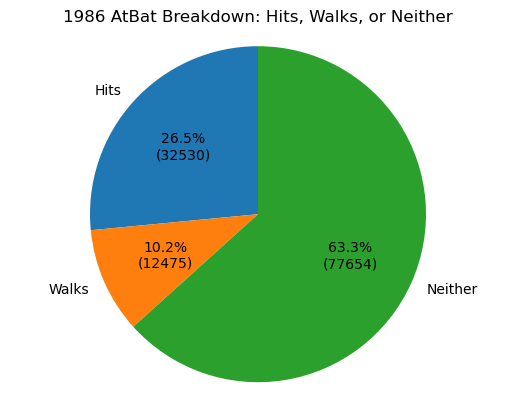

In [ ]:
#Q2(D)
import pandas as pd
import matplotlib.pyplot as plt

# Load the Hitters data.
Hitters = pd.read_csv('../Data/Hitters.csv')

# We only need these three columns for the pie chart dropna() makes sure we don't accidentally add NaNs into our totals.
df = Hitters[['AtBat', 'Hits', 'Walks']].dropna()

# Totals of ALL players in the dataset
total_atbat  = df['AtBat'].sum()
total_hits   = df['Hits'].sum()
total_walks  = df['Walks'].sum()
neither = total_atbat - (total_hits + total_walks) 

neither = max(neither, 0)

# Build the pie chart inputs.
sizes  = [total_hits, total_walks, neither]
labels = ['Hits', 'Walks', 'Neither']

# Make a simple clean pie chart.
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    # Show both the percent and the actual count.
    autopct=lambda p: f'{p:.1f}%\n({p*sum(sizes)/100:.0f})',
    startangle=90 
)
ax.axis('equal') 
ax.set_title('1986 AtBat Breakdown: Hits, Walks, or Neither')

plt.show()


In [ ]:
#Q2(E)
import pandas as pd
import numpy as np
Hitters = pd.read_csv('../Data/Hitters.csv')
Hitters["Salary"].isna().sum()


np.int64(59)

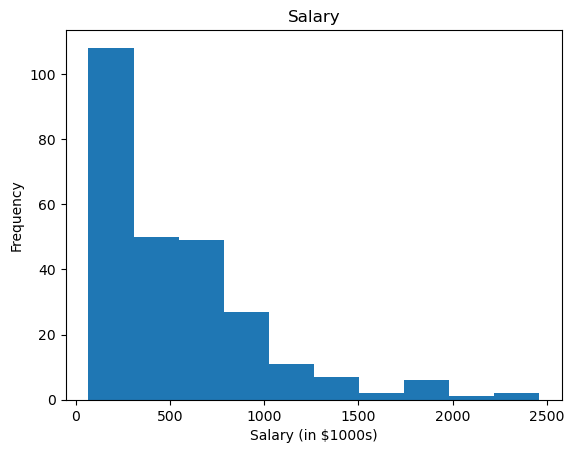

In [ ]:
#Q2(F)
import matplotlib.pyplot as plt

# Keep only the salaries that are actually present and drop missing entries 
s = Hitters['Salary'].dropna()

#plot
plt.figure()

# Make a basic histogram of salaries.
plt.hist(s)
plt.xlabel('Salary (in $1000s)')
plt.ylabel('Frequency')
plt.title('Salary')

# Show the plot
plt.show()


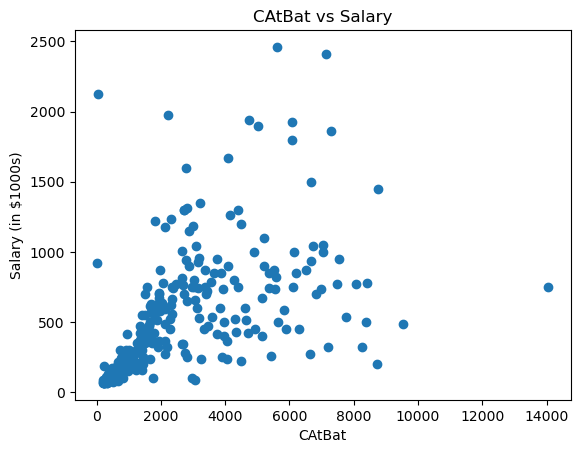

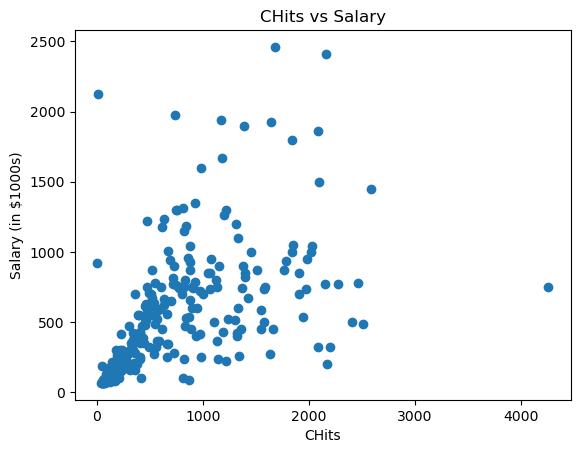

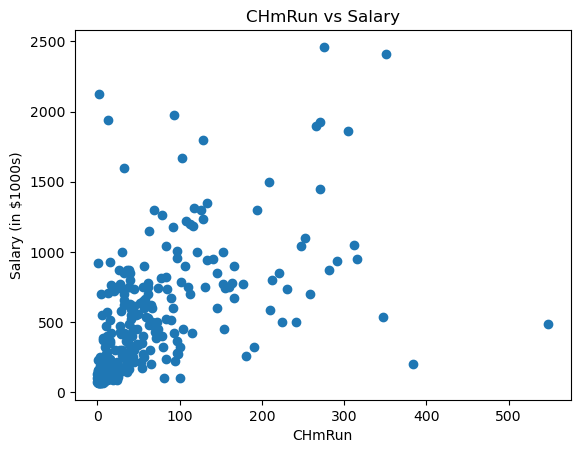

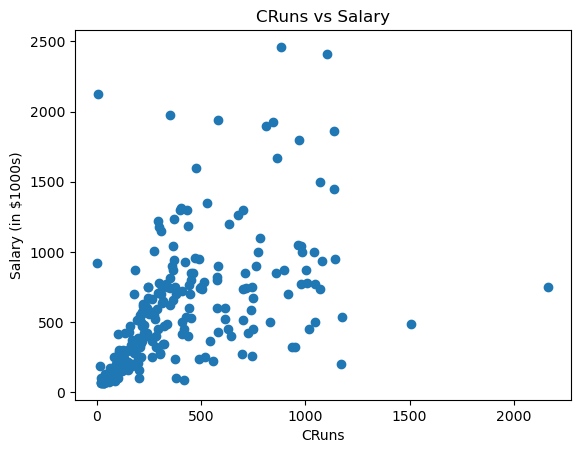

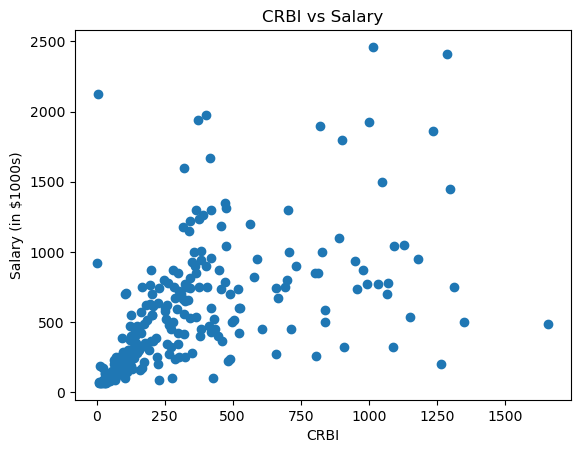

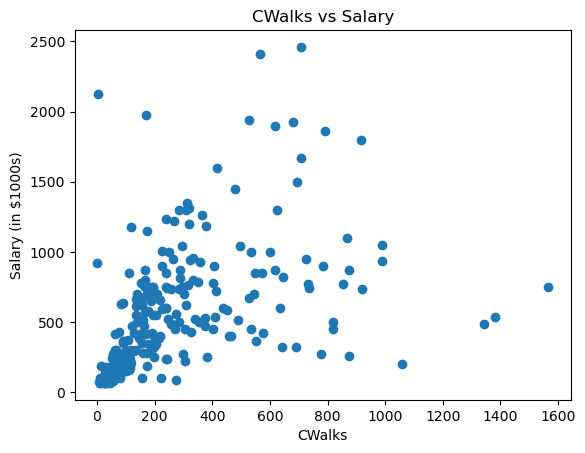

In [ ]:
#Q2(G)
import matplotlib.pyplot as plt

# Keep rows where both Salary and the career metrics are present but no NaNs.
metrics = ["CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"]
df = Hitters[metrics + ["Salary"]].dropna()

# Make one scatterplot per career metric against Salary.
for m in metrics:
    plt.figure()
    plt.scatter(df[m], df["Salary"])
    plt.xlabel(m)
    plt.ylabel("Salary (in $1000s)")
    plt.title(f"{m} vs Salary")
    plt.show()


In [ ]:
#Q2(H)
import pandas as pd

#Hitters have columns Division and Salary 
df = Hitters[['Division', 'Salary']].dropna()

#mean and total salary for each division
mean_by_div = df.groupby('Division')['Salary'].mean()

# Total salary in dollars for each division
totals_dollars = df.groupby('Division')['Salary'].sum() * 1000  # keep numeric

print("Mean salary by division (in $1000s):")
print(mean_by_div.round(1).to_string(name=False))   # no “Name: …, dtype: …”

print("\nTotal salary by division (in $):")
print(totals_dollars.map(lambda x: f"${x:,.0f}").to_string(name=False))  # format then print

# Identify which division spends more and by how much
winner = totals_dollars.idxmax()
loser  = totals_dollars.idxmin()
difference = totals_dollars[winner] - totals_dollars[loser]

# Print the result
print(f"{winner} Division spends more in total salary than {loser} Division by ${difference:,.0f}.")


Mean salary by division (in $1000s):
Division
E    624.3
W    450.9

Total salary by division (in $):
Division
E    $80,531,006
W    $60,417,501
E Division spends more in total salary than W Division by $20,113,505.


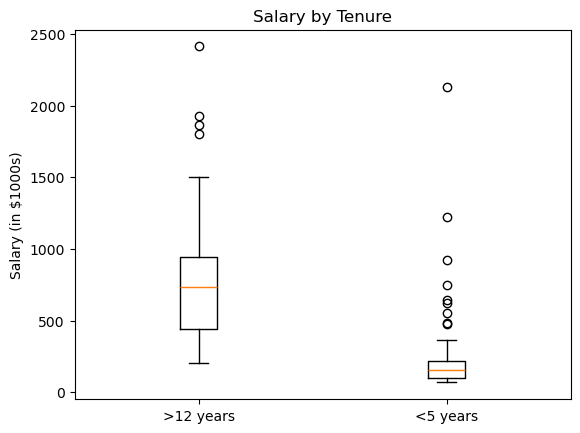

In [ ]:
#Q2(I)
import pandas as pd
import matplotlib.pyplot as plt

#rows with both Years and Salary present
df = Hitters[['Years', 'Salary']].dropna()

# Define the two tenure groups one >12 years and other <5 years 
sal_long  = df.loc[df['Years'] > 12, 'Salary']
sal_short = df.loc[df['Years'] < 5,  'Salary']

# Make the boxplots
plt.figure()
plt.boxplot([sal_long, sal_short], tick_labels=['>12 years', '<5 years'])
plt.ylabel('Salary (in $1000s)')
plt.title('Salary by Tenure')
plt.show()


In [ ]:
#Q2(J)
import pandas as pd

# Load the data
Hitters = pd.read_csv('../Data/Hitters.csv')

#add player name if missing
if 'Player' not in Hitters.columns:
    if 'Unnamed: 0' in Hitters.columns:            # common export case
        Hitters = Hitters.rename(columns={'Unnamed: 0': 'Player'})
    else:                                          # last resort: use the index as a name
        Hitters = Hitters.reset_index().rename(columns={'index': 'Player'})

#Compute career batting average (hits per at-bat) and keep valid rows
df = Hitters[['Player', 'League', 'Division', 'Salary', 'CHits', 'CAtBat']].dropna()
df = df[df['CAtBat'] > 0].copy()
df['CareerAvg'] = df['CHits'] / df['CAtBat']

#Choose the best player
best = df.loc[df['CareerAvg'].idxmax()]
print("Player with highest career batting average:")
print(f"Name:      {best['Player']}")
print(f"League:    {best['League']}  (A = American, N = National)")
print(f"Division:  {best['Division']}  (E = East, W = West)")
print(f"Salary:    ${int(best['Salary'] * 1000):,}")
print(f"CareerAvg: {best['CareerAvg']:.3f}")

#shpw top 5 players
top5 = df.sort_values('CareerAvg', ascending=False).head(5)
print(
    top5[['Player','League','Division','Salary','CareerAvg']].to_string(
        index=False,
        formatters={'Salary': lambda x: f"${int(x*1000):,}", 'CareerAvg': '{:.3f}'.format}
    )
)


Player with highest career batting average:
Name:      313
League:    A  (A = American, N = National)
Division:  E  (E = East, W = West)
Salary:    $1,600,000
CareerAvg: 0.352
 Player League Division     Salary CareerAvg
    313      A        E $1,600,000     0.352
     82      A        E $1,975,000     0.332
    290      N        W   $740,000     0.326
    176      N        W    $86,500     0.320
    110      A        W $1,500,000     0.314


# Q2(K)
The five players with the highest career batting averages stand out for both their skill and the different ways they achieved success:
   1. Contact skill + longevity: All five players had excellent bat-to-ball ability and sustained opportunities at the plate, proven by high hit totals and large numbers of at-bats.
   2. Consistency over seasons: Their averages (.320–.340 range) weren’t just from short hot streaks but from steady performance across many years.
   3. Different styles of hitting: Some leaned on line-drive contact with fewer home runs and RBIs, while others paired high averages with solid power and run production.
   4. Approach at the plate: Walk totals show variety—patient hitters who drew many walks versus aggressive hitters who swung often but put plenty of balls in play.
   5. Salary impact: Their pay generally reflected elite performance, though it also depended on era, team payroll, and contract timing.
   6. Sample-size caution: If one player has far fewer at-bats, their high average may be more of a small-sample outlier than proof of long-term dominance.